# **Data Analysis Code- Team 8-  Netflix Project**
### Project 1- UMN Data Bootcamp
- Satya Sakuntala NagaSravya Mattapalli
- Edith Lotterman
- Kevin Ybarra
- Zack Crowley

In [1]:
# Dependencies:
import numpy as np
import pandas as pd
import scipy.stats as stat
from matplotlib import pyplot as plt, dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import gmaps
from config import api_key
from api_keys import gkey 
from pprint import pprint
import requests
import math
from collections import Counter
import geopandas as gpd

## **Data**

In [2]:
# Read in data and adjust week col:
# global netflix data from netflix.com top 10 weekly shows
netflix_df = pd.read_csv("output_data/cleaned_netflix_data.csv")
# Clean week date, save as datetype and make a month_year col var:
netflix_df['week'] = pd.to_datetime(netflix_df['week'])
netflix_df['month_year']= netflix_df['week'].dt.to_period('M')
print(netflix_df.dtypes)
netflix_df.head()


week                          datetime64[ns]
category                              object
weekly_rank                            int64
weekly_hours_viewed                    int64
cumulative_weeks_in_top_10             int64
Show_title                            object
type                                  object
description                           object
release_year                           int64
age_certification                     object
runtime_mins                         float64
genres                                object
production_countries                  object
imdb_id                               object
imdb_score                           float64
imdb_votes                           float64
drama                                  int64
comedy                                 int64
action                                 int64
family                                 int64
crime                                  int64
romance                                int64
month_year

,week,category,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,Show_title,type,description,release_year,age_certification,...,imdb_id,imdb_score,imdb_votes,drama,comedy,action,family,crime,romance,month_year
0,2022-10-30,Films (English),1,68310000,1,the good nurse,movie,An infamous caregiver is implicated in the dea...,2022,R,...,tt4273800,7.1,204.0,1,0,0,0,1,0,2022-10
1,2022-10-30,Films (English),2,41950000,2,the school for good and evil,movie,Best friends Sophie and Agatha find themselves...,2022,PG-13,...,tt2935622,5.8,18952.0,1,1,1,0,0,0,2022-10
2,2022-10-30,Films (English),3,9170000,2,the stranger,SHOW,A web of secrets sends family man Adam Price o...,2020,TV-MA,...,tt9698480,7.3,48298.0,1,0,0,0,1,0,2022-10
3,2022-10-30,Films (English),4,8890000,1,wild is the wind,movie,An immigrant Nevada rancher brings a woman fro...,1957,Not Rated,...,tt0051193,6.7,1027.0,1,0,0,0,0,0,2022-10
4,2022-10-30,Films (English),5,8170000,3,the curse of bridge hollow,movie,"A teenage girl, who accidentally releases an a...",2022,TV-14,...,tt15289240,0.0,4085.0,0,1,0,1,0,0,2022-10


In [3]:
# Count all vars:
netflix_df.count()


week                          2069
category                      2069
weekly_rank                   2069
weekly_hours_viewed           2069
cumulative_weeks_in_top_10    2069
Show_title                    2069
type                          2069
description                   2069
release_year                  2069
age_certification             2069
runtime_mins                  2069
genres                        2069
production_countries          2065
imdb_id                       2069
imdb_score                    2069
imdb_votes                    2069
drama                         2069
comedy                        2069
action                        2069
family                        2069
crime                         2069
romance                       2069
month_year                    2069
dtype: int64

## **Analysis- Exploratory**:
#### Correlations: 
- runtime and imdb rating or votes
- age_certification and imdb score or votes 

In [3]:
# Create df's for each of the 4 categories: Show/film and English/Non-English
# var = category
eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (English)"]
eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (English)"]
non_eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (Non-English)"]
non_eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (Non-English)"]

# Count all:
print(f"English Films:",eng_film_df["Show_title"].nunique())
print(f"English Show:",eng_show_df["Show_title"].nunique())
print(f"Non-English Films:",non_eng_film_df["Show_title"].nunique())
print(f"Non-English Show:",non_eng_show_df["Show_title"].nunique())
# Not a lot of Non-english films by comparison.
print(f"total unique shows:",eng_film_df["Show_title"].nunique() + eng_show_df["Show_title"].nunique() + 
                            non_eng_film_df["Show_title"].nunique()+non_eng_show_df["Show_title"].nunique())

English Films: 263
English Show: 152
Non-English Films: 92
Non-English Show: 139
total unique shows: 646


In [ ]:
# Corr matrix for Eng film dataset:
corr_matrix_eng_film = eng_film_df.corr()
print(corr_matrix_eng_film)

# Largest positive corr:
print(corr_matrix_eng_film.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_eng_film.unstack().sort_values().head(22))


In [ ]:
# Corr matrix for Eng show dataset:
corr_matrix_eng_show = eng_show_df.corr()
# print(corr_matrix_eng_show)

# Largest positive corr:
print(corr_matrix_eng_show.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_eng_show.unstack().sort_values().head(22))


In [ ]:
# Corr matrix for Non Eng show dataset:
corr_matrix_non_eng_show = non_eng_show_df.corr()
# print(corr_matrix_eng_show)

# Largest positive corr:
print(corr_matrix_non_eng_show.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_non_eng_show.unstack().sort_values().head(22))

In [ ]:
# Corr matrix for Non Eng film dataset:
corr_matrix_non_eng_film = non_eng_film_df.corr()
# print(corr_matrix_eng_show)

# Largest positive corr:
print(corr_matrix_non_eng_film.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_non_eng_film.unstack().sort_values().head(22))

In [ ]:
# Corr matrix for only dramas in the dataset:
drama_df = netflix_df.loc[netflix_df["drama"]==1]
corr_matrix_drama = drama_df.corr()
# print(corr_matrix)

# Largest positive corr:
print(corr_matrix_drama.unstack().sort_values().tail(55))

# Largest negative corr:
print(corr_matrix_drama.unstack().sort_values().head(22))

#### **Analysis to Include**
- First up Satya's Code:

In [4]:
# Grouped by show_title to find top weekly rank per each movie vs cumulative_weeks_in_top_10
groupedby_title = netflix_df.groupby("Show_title").agg({"weekly_rank":"min","cumulative_weeks_in_top_10":"max"}).reset_index()

rank_df = pd.merge(groupedby_title,netflix_df,how="inner",on=["Show_title","weekly_rank","cumulative_weeks_in_top_10"])
rank_df


,Show_title,weekly_rank,cumulative_weeks_in_top_10,week,category,weekly_hours_viewed,type,description,release_year,age_certification,...,imdb_id,imdb_score,imdb_votes,drama,comedy,action,family,crime,romance,month_year
0,1917,7,1,2022-08-14,Films (English),10840000,movie,"April 6th, 1917. As an infantry battalion asse...",2019,R,...,tt8579674,8.2,579698.0,1,0,1,0,0,0,2022-08
1,21 jump street,6,1,2021-11-07,Films (English),11690000,movie,A pair of underachieving cops are sent back to...,2012,R,...,tt1232829,7.2,556200.0,0,1,1,0,1,0,2021-11
2,211,6,1,2021-11-14,Films (English),7900000,movie,"While on a routine patrol, an aging cop, his p...",2018,R,...,tt4976192,4.4,8489.0,1,0,1,0,0,0,2021-11
3,42 days of darkness,7,1,2022-05-15,TV (Non-English),9920000,SHOW,"In a town in Chile, a woman leads a frantic se...",2022,TV-MA,...,tt15090462,6.5,1040.0,1,0,0,0,1,0,2022-05
4,6 underground,5,3,2022-04-03,Films (English),8730000,MOVIE,"After faking his death, a tech billionaire rec...",2019,R,...,tt8106534,6.1,172083.0,0,1,1,0,0,0,2022-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,world trade center,10,1,2021-08-08,Films (English),5050000,movie,Two Port Authority police officers become trap...,2006,PG-13,...,tt0469641,6.0,84290.0,1,0,0,0,0,0,2021-08
308,worth,3,2,2021-09-12,Films (English),13560000,MOVIE,"Kenneth Feinberg, a powerful D.C. lawyer appoi...",2021,PG-13,...,tt8009744,6.8,13524.0,1,0,0,0,0,0,2021-09
309,yakuza princess,5,1,2022-04-24,Films (English),7490000,movie,The heiress to half of the Yakuza crime syndic...,2021,R,...,tt10715446,4.7,1708.0,0,0,0,0,0,0,2022-04
310,yeh kaali kaali ankhein,6,1,2022-01-23,TV (Non-English),11260000,SHOW,Relentlessly pursued by a powerful politician’...,2022,TV-MA,...,tt14160712,7.0,7569.0,1,0,0,0,1,0,2022-01


In [89]:
# titles showed up in cumulative_weeks_in_top_10 for more than 10 times
weeks_in_top10 = netflix_df.groupby("Show_title").max().sort_values(by="cumulative_weeks_in_top_10",ascending=False).reset_index()

weeks_in_top10 = weeks_in_top10.loc[weeks_in_top10["cumulative_weeks_in_top_10"]>=10][["Show_title","category","cumulative_weeks_in_top_10","type","production_countries"]]

weeks_in_top10

,Show_title,category,cumulative_weeks_in_top_10,type,production_countries
0,"yo soy betty, la fea",TV (Non-English),30,series,Colombia
1,squid game,TV (Non-English),20,SHOW,South Korea
2,stranger things,TV (English),19,SHOW,United States
3,manifest,TV (English),19,SHOW,United States
4,extraordinary attorney woo,TV (Non-English),17,SHOW,South Korea
5,hometown cha-cha-cha,TV (Non-English),16,SHOW,South Korea
6,the queen of flow,TV (Non-English),16,SHOW,Columbia
7,alchemy of souls,TV (Non-English),15,SHOW,South Korea
8,money heist,TV (Non-English),14,SHOW,Spain
9,red notice,Films (English),14,MOVIE,United States


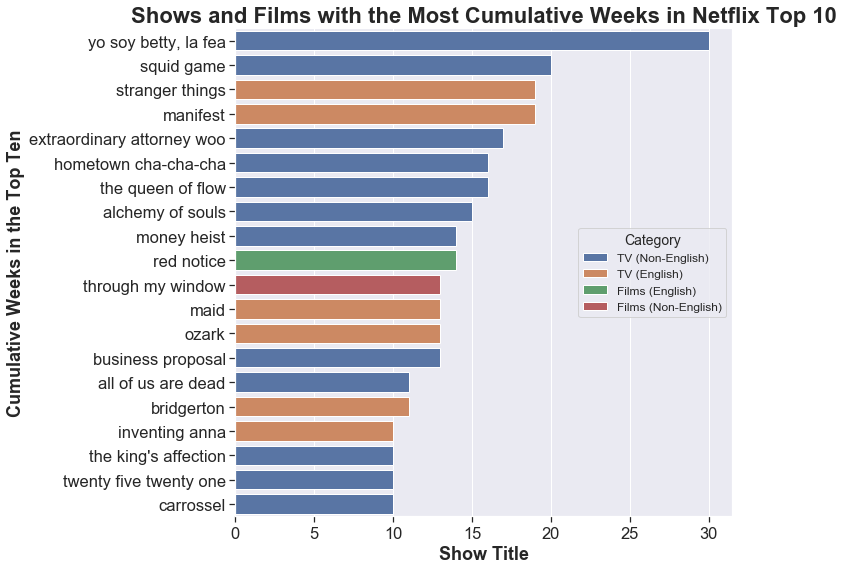

In [138]:
# Top 20 Shows/Films with the Most Weeks in the Netflix Top 10
# using Seaborn:
# set theme:
plt.rcParams.update({'figure.autolayout': True})
sns.set_theme(style="darkgrid", font_scale=1.5,rc={'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(11.7,8.27))
g = sns.barplot(data=weeks_in_top10, y= "Show_title", x ="cumulative_weeks_in_top_10",hue="category",dodge=False)
# Add titles:   
plt.title("Shows and Films with the Most Cumulative Weeks in Netflix Top 10",size=22, weight="bold")
plt.xlabel("Show Title", size=18, weight="bold")
plt.ylabel("Cumulative Weeks in the Top Ten", size=18, weight="bold")
# Label legend and move to outside right side:
plt.legend(title= 'Category', fontsize='12', title_fontsize='14', loc='center right')

# Save to output_data folder:
fig.savefig('./output_data/Bar_TopShowsMostWeeksTop10.png')

In [6]:
# Netflix hits don't stay popular for long
weeks_in_top10 = netflix_df.groupby("Show_title").max().sort_values(by="cumulative_weeks_in_top_10",ascending=False).reset_index()
popularity_fading = weeks_in_top10.groupby("cumulative_weeks_in_top_10").count().sort_values(by="cumulative_weeks_in_top_10").reset_index()
popularity_fading = popularity_fading[["Show_title","cumulative_weeks_in_top_10"]]
popularity_fading

,Show_title,cumulative_weeks_in_top_10
0,237,1
1,168,2
2,97,3
3,42,4
4,35,5
5,22,6
6,10,7
7,11,8
8,2,9
9,4,10


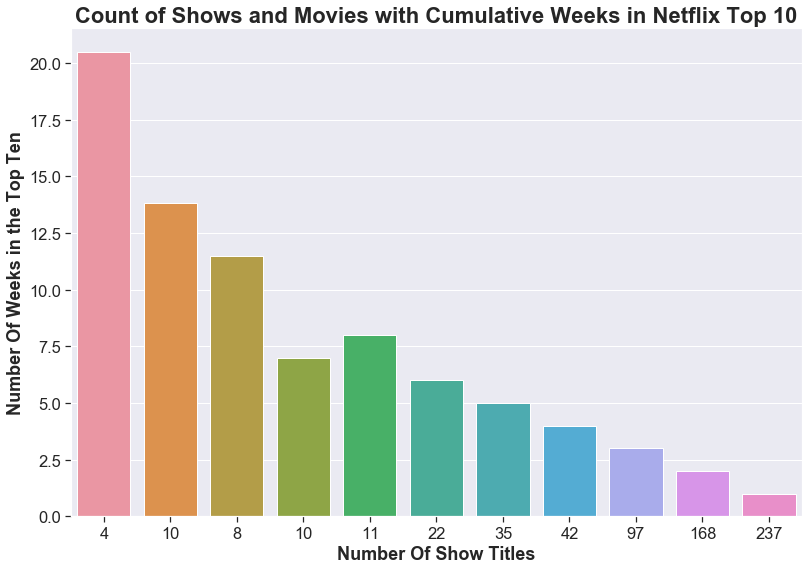

In [137]:
# Bar graph to show how many movies stayed in top for long
# using Seaborn:
# set theme:
plt.rcParams.update({'figure.autolayout': True})
sns.set_theme(style="darkgrid", font_scale=1.5,rc={'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(11.7,8.27))
g = sns.barplot(data=popularity_fading, y= "cumulative_weeks_in_top_10", x ="Show_title", ci=None)
ax.set_xticklabels([4,10,8,10,11,22,35,42,97,168,237])
# Add titles:   
plt.title("Count of Shows and Movies with Cumulative Weeks in Netflix Top 10",size=22, weight="bold")
plt.xlabel("Number Of Show Titles", size=18, weight="bold")
plt.ylabel("Number Of Weeks in the Top Ten", size=18, weight="bold")

# Save to output_data folder:
fig.savefig('./output_data/Bar_CountofCumulativeWeeks_Top10.png')

**Netflix hits don't stay popular for long**
- As the chart shows only handful of movies stays in top 10 for more than 10 cumulative weeks.
- The popularity of the content fades as the weeks pass.
- Less than 1% of content stays top more than 20 weeks and about 2% of contents stays top more than 10 cumulativeweeks.
- About 90% of the content won't stay in top more than 3 cumulative weeks

In [92]:
# Top 10 and least 10 genre combinations according to average IMDB score which has votes more than 1000
genre_score = netflix_df.loc[(netflix_df["imdb_votes"]>=1000 )& (netflix_df["imdb_score"] ),["genres","imdb_score"]]

genre_score = genre_score.groupby("genres").mean().reset_index().sort_values(by="imdb_score",ascending=False)
top_10 = genre_score.loc[genre_score["imdb_score"]>8].head(10)
least_10 = genre_score.loc[genre_score["imdb_score"]<5].tail(10)
top_10
least_10

,genres,imdb_score
210,"horror, thriller, crime",4.800000
56,"animation, adventure, family",4.800000
12,"action, comedy, drama",4.733333
29,"action, fantasy",4.700000
226,"scifi, action",4.700000
46,"adventure, drama, fantasy",4.700000
262,"thriller, action, drama",4.500000
197,"fantasy, action, crime, drama",4.400000
96,"crime, action, drama, thriller",3.800000
249,"scifi, thriller, action, horror",3.700000


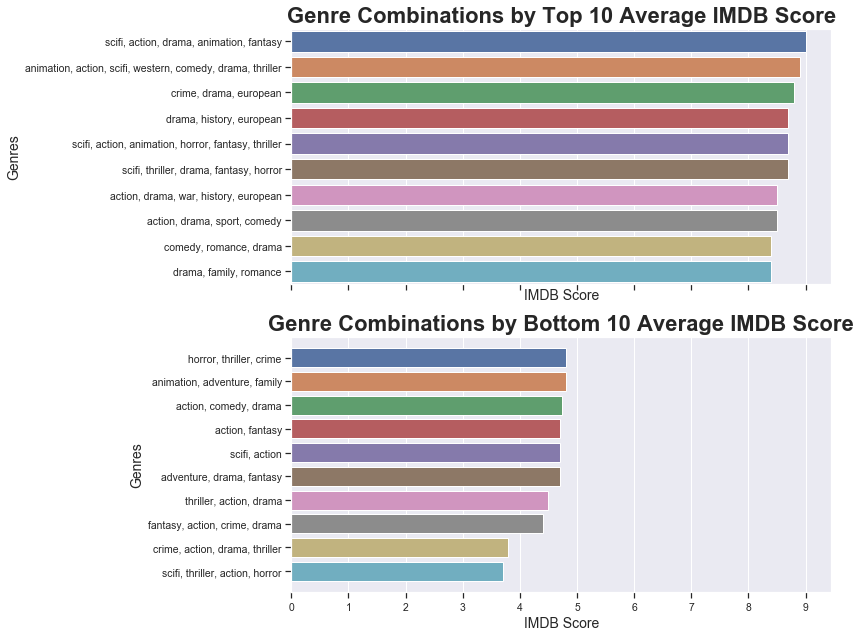

In [136]:
# Plot to show top movies or shows according to genres based on IMDB Score
#define plotting region (2 rows, 1 columns)
plt.rcParams.update({'figure.autolayout': True})
sns.set_theme(style="darkgrid", font_scale=.95,rc={'xtick.bottom': True,
    'ytick.left': True,})
fig, ax = plt.subplots(2, 1,sharex=True,figsize=(12,9))
sns.barplot(ax=ax[0], data=top_10, x= "imdb_score", y ="genres").set_title("Genre Combinations by Top 10 Average IMDB Score",size=22, weight="bold")
sns.barplot(ax=ax[1], data=least_10, x= "imdb_score", y ="genres").set_title("Genre Combinations by Bottom 10 Average IMDB Score",size=22, weight="bold")
plt.xticks(range(0,11))
ax[0].set_xlabel('IMDB Score', fontsize=14)
ax[0].set_ylabel('Genres', fontsize=14)
ax[1].set_xlabel('IMDB Score', fontsize=14)
ax[1].set_ylabel('Genres', fontsize=14)
plt.autoscale()

# Save to output_data folder:
fig.savefig('./output_data/HorzBar_TopandBottomGenrebyIMDBScore.png')

**How Different Combination of genres working?**
- Analysis was made on those movie/shows that has more than 1000 votes because these ratings are from worldwide. Grouped by movies that has these genre combinations and calculated the average rating for each combo of the genre.
- This chart depicts how various combinations of genres effect IMDB Score and also the top 10 genre combinations and bottom ten genre combinations. 
- The shows/movies that has combination scifi,action,drama,animation,fantasy has average rating of 9 which is in top. 
- The shows/movies that has combination of scifi, thriller, action, horror has average rating of 3.7 which is in bottom.


#### Zack's CODE:

In [108]:
# Potential Bar Chart:
# Total hours viewed for each rank for English-films, how much time is the top show watched vs. number two vs. number three, etc.
eng_film_df.groupby("weekly_rank").weekly_hours_viewed.agg("mean")


weekly_rank
1     6.032944e+07
2     3.009388e+07
3     1.852204e+07
4     1.477143e+07
5     1.152607e+07
6     9.708491e+06
7     8.184912e+06
8     7.316000e+06
9     6.624483e+06
10    6.048305e+06
Name: weekly_hours_viewed, dtype: float64

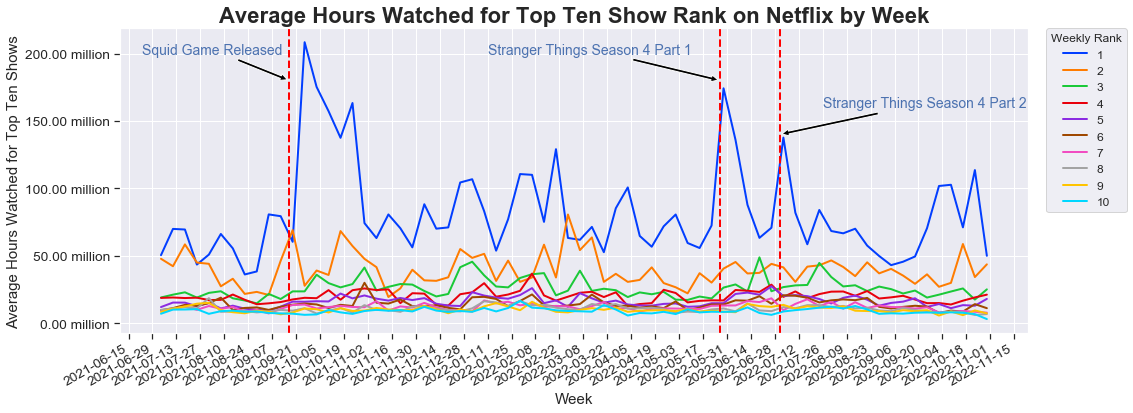

In [4]:
# Plotting hours watched by rank over weeks:
# Average hours viewd for the top 10 shows by week:
# using Seaborn:
# set theme:
plt.rcParams.update({'figure.autolayout': True})
sns.set_theme(style="darkgrid", font_scale=1.25,rc={"lines.linewidth": 2,'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(16, 6))
# Set color for lines:
palette = sns.color_palette("bright", 10)
# Create the plot, take out conf int, set color and ax:
g = sns.lineplot(ax=ax, data=netflix_df, x="week", y="weekly_hours_viewed", hue="weekly_rank", palette= palette, ci=None)
# Gen y labels, divide by 1 million and label million:
ylabels = ['{:,.2f}'.format(y) + ' million' for y in g.get_yticks()/1000000]
# Set y labels:
g.set_yticklabels(ylabels)
# Format x label for dates: 
# Define the date format and set it to the x-axis:
date_form = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for every other week using (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# add minor tick marks on x-axis:
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=2))
# Format for date x-axis, turns date to side:
fig.autofmt_xdate()
# Add titles:
plt.title("Average Hours Watched for Top Ten Show Rank on Netflix by Week",size=22, weight="bold")
plt.xlabel("Week")
plt.ylabel("Average Hours Watched for Top Ten Shows")
# Label legend and move to outside right side:
plt.legend(title='Weekly Rank', fontsize='12', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Add labels to the plot of what show were likely driving large spikes in viewership:
# Squid game: released 2021-9-17
squid_game_rel_date = dt.datetime(2021,9,17) 
style = dict(size=14, color='b')
ax.annotate('Squid Game Released', xy=(squid_game_rel_date, 180000000), xycoords='data', xytext=(dt.datetime(2021,6,23), 200000000), textcoords='data',
arrowprops=dict(arrowstyle='simple', facecolor='black', connectionstyle="arc3"), **style)
plt.axvline(x=squid_game_rel_date, color='red',lw=2,ls='--')

# Next show: Stranger Things Season 4 Part 1 
strangerThings1_rel_date = dt.datetime(2022,5,27) 
ax.annotate('Stranger Things Season 4 Part 1 ', xy=(strangerThings1_rel_date, 180000000), xycoords='data', xytext=(dt.datetime(2022,1,11), 200000000), textcoords='data',
arrowprops=dict(arrowstyle='simple', facecolor='black', connectionstyle="arc3"), **style)
plt.axvline(x=strangerThings1_rel_date, color='red',lw=2,ls='--')

# Stranger Things Season 4 Part 2 
strangerThings2_rel_date = dt.datetime(2022,7,1) 
ax.annotate('Stranger Things Season 4 Part 2', xy=(strangerThings2_rel_date, 140000000), xycoords='data', xytext=(dt.datetime(2022,7,26), 160000000), textcoords='data',
arrowprops=dict(arrowstyle='simple', facecolor='black', connectionstyle="arc3"), **style)
plt.axvline(x=strangerThings2_rel_date, color='red',lw=2,ls='--')

# Save to output_data folder:
fig.savefig('./output_data/Average_Hours_TopTenShowsbyWeek.png')

In [19]:
# Look up the shows that may be driving the large spikes in viewing:
# Between 2021-09-05 and 2021-11-05
sept_nov_2021 = netflix_df.loc[(netflix_df["week"]>"2021-09-05")&(netflix_df["week"]<"2021-11-28")]
# groupby Show_title and add up weekly_hours_viewed
sum_most_viewed_sept_nov_2021 = sept_nov_2021.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
sum_most_viewed_sept_nov_2021.head(10)
squid_game_rel_date = dt.datetime(2021,9,17) 
# Top 5:
# Show_title
# squid game              2131320000
# you                      747920000
# maid                     587310000
# sex education            561360000
# money heist              380010000

# Between 2021-11-16 and 2022-01-11
nov_2021_jan_22 = netflix_df.loc[(netflix_df["week"]>"2021-11-16")&(netflix_df["week"]<"2022-01-11")]
# groupby Show_title and add up weekly_hours_viewed
sum_most_viewed_nov_2021_jan_22 = nov_2021_jan_22.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
sum_most_viewed_nov_2021_jan_22.head(10)
# Top 5:
# Show_title
# the witcher          657930000
# money heist          512060000
# the queen of flow    433480000
# don't look up        321520000
# cobra kai            304610000
witcher_rel_date = dt.datetime(2021,12,17) 
moneyHeist_rel_date = dt.datetime(2021,12,3) 

### Plotting most watched shows by week- top ten per category:

In [6]:
# Get the top shows by total hours viewed weekly added up, to plot over time- Top Ten:
# groupby Show_title and add up weekly_hours_viewed
sum_most_viewed= netflix_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
topTen_sum_most_viewed = sum_most_viewed.head(10)
# Possible bar chart and could put this in the long time series plot above
topTen_sum_most_viewed_index = topTen_sum_most_viewed.keys()
topTen_sum_most_viewed_df = netflix_df.loc[netflix_df["Show_title"].isin(topTen_sum_most_viewed_index)]

# groupby Show_title and add up weekly_hours_viewed by Top Ten = eng_show_df
sum_most_viewed_eng_show = eng_show_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
topTen_sum_most_viewed_eng_show = sum_most_viewed_eng_show.head(10)
topTen_sum_most_viewed_eng_show_index = topTen_sum_most_viewed_eng_show.keys()
topTen_sum_most_viewed_eng_show_df = netflix_df.loc[netflix_df["Show_title"].isin(topTen_sum_most_viewed_eng_show_index)]
# groupby Show_title and add up weekly_hours_viewed by Top Ten = eng_film_df
sum_most_viewed_eng_film = eng_film_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
topTen_sum_most_viewed_eng_film = sum_most_viewed_eng_film.head(10)
topTen_sum_most_viewed_eng_film_index = topTen_sum_most_viewed_eng_film.keys()
topTen_sum_most_viewed_eng_film_df = netflix_df.loc[netflix_df["Show_title"].isin(topTen_sum_most_viewed_eng_film_index)]

# # groupby Show_title and add up weekly_hours_viewed by Top Ten = non_eng_show_df
# sum_most_viewed_non_eng_show = non_eng_show_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
# topTen_sum_most_viewed_non_eng_show = sum_most_viewed_non_eng_show.head(10)
# # groupby Show_title and add up weekly_hours_viewed by Top Ten = non_eng_film_df
# sum_most_viewed_non_eng_film = non_eng_film_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
# topTen_sum_most_viewed_non_eng_film = sum_most_viewed_non_eng_film.head(10)
topTen_sum_most_viewed_eng_film

Show_title
red notice              453990000
don't look up           389580000
the gray man            265980000
the adam project        260520000
purple hearts           240480000
the unforgivable        219550000
hustle                  198310000
the sea beast           190150000
the man from toronto    170820000
senior year             167600000
Name: weekly_hours_viewed, dtype: int64

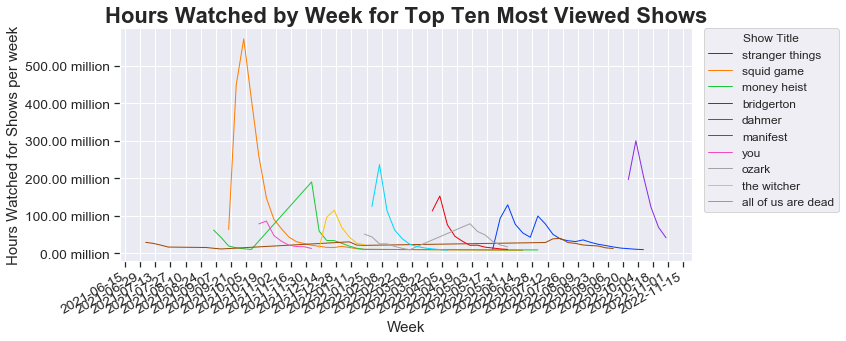

In [12]:
# Plotting hours watched by Top ten shows(total hours viewed) over weeks:
# Average hours viewd for all shows by week:
# using Seaborn:
# set theme:
plt.rcParams.update({'figure.autolayout': True})
sns.set_theme(style="darkgrid", font_scale=1.25,rc={"lines.linewidth": 1,'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(12, 5))
# Set color for lines:
palette = sns.color_palette("bright", 10)
# Create the plot, take out conf int, set color and ax:
g = sns.lineplot(ax=ax, data=topTen_sum_most_viewed_df, x="week", y="weekly_hours_viewed", hue="Show_title", ci=None, palette= palette, hue_order = topTen_sum_most_viewed_index)
# Gen y labels, divide by 1 million and label million:
ylabels = ['{:,.2f}'.format(y) + ' million' for y in g.get_yticks()/1000000]
# Set y labels:
g.set_yticklabels(ylabels)
# Format x label for dates: 
# Define the date format and set it to the x-axis:
date_form = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for every other week using (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# add minor tick marks on x-axis:
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=2))
# Format for date x-axis, turns date to side:
fig.autofmt_xdate()
# Add titles:
plt.title("Hours Watched by Week for Top Ten Most Viewed Shows",size=22, weight="bold")
plt.xlabel("Week")
plt.ylabel("Hours Watched for Shows per week")
handles,labels=ax.get_legend_handles_labels()
sorted_legends= topTen_sum_most_viewed_index #sort the labels based on the average which is on a list
# Label legend and move to outside right side:
# Set order of legend = list of top ten most viewed topTen_sum_most_viewed
ax.legend(title='Show Title', fontsize='12', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.autoscale()
# Save to output_data folder:
fig.savefig('./output_data/Hours_TopTenShowsbyWeek.png')

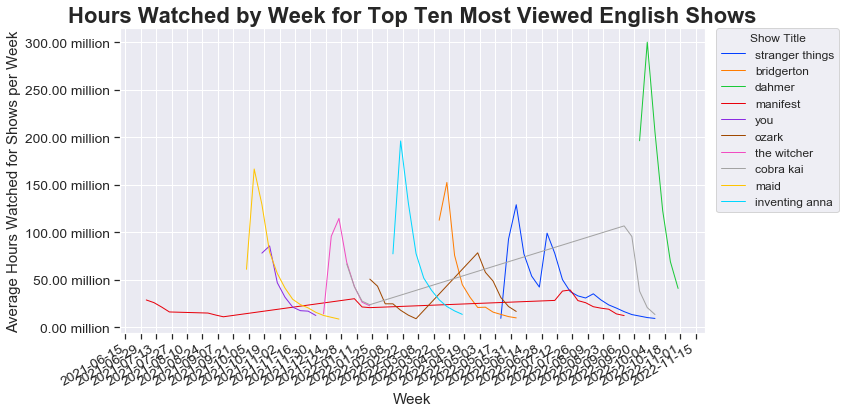

In [19]:
# Plotting hours watched by Top ten English speaking shows(total hours viewed) over weeks:
# Average hours viewd for all shows by week:
# using Seaborn:
# set theme:
plt.rcParams.update({'figure.autolayout': True})
sns.set_theme(style="darkgrid", font_scale=1.25,rc={"lines.linewidth": 1,'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(12, 6))
# Set color for lines:
palette = sns.color_palette("bright", 10)
# Create the plot, take out conf int, set color and ax:
g = sns.lineplot(ax=ax, data=topTen_sum_most_viewed_eng_show_df, x="week", y="weekly_hours_viewed", hue="Show_title", ci=None, palette= palette, hue_order = topTen_sum_most_viewed_eng_show_index)
# Gen y labels, divide by 1 million and label million:
ylabels = ['{:,.2f}'.format(y) + ' million' for y in g.get_yticks()/1000000]
# Set y labels:
g.set_yticklabels(ylabels)
# Format x label for dates: 
# Define the date format and set it to the x-axis:
date_form = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for every other week using (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# add minor tick marks on x-axis:
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=2))
# Format for date x-axis, turns date to side:
fig.autofmt_xdate()
# Add titles:
plt.title("Hours Watched by Week for Top Ten Most Viewed English Shows",size=22, weight="bold")
plt.xlabel("Week")
plt.ylabel("Average Hours Watched for Shows per Week")
handles,labels=ax.get_legend_handles_labels()
sorted_legends= topTen_sum_most_viewed_index #sort the labels based on the average which is on a list
# Label legend and move to outside right side:
# Set order of legend = list of top ten most viewed topTen_sum_most_viewed
ax.legend(title='Show Title', fontsize='12', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Save to output_data folder:
fig.savefig('./output_data/Hours_TopTenShows_English_byWeek.png')

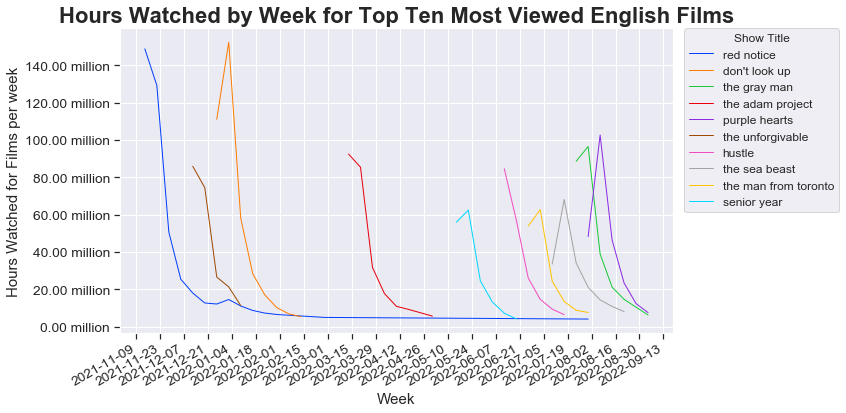

In [18]:
# Plotting hours watched by Top ten English speaking Films (total hours viewed) over weeks:
# Average hours viewd for all shows by week:
# using Seaborn:
# set theme:
plt.rcParams.update({'figure.autolayout': True})
sns.set_theme(style="darkgrid", font_scale=1.25,rc={"lines.linewidth": 1,'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(12, 6))
# Set color for lines:
palette = sns.color_palette("bright", 10)
# Create the plot, take out conf int, set color and ax:
g = sns.lineplot(ax=ax, data=topTen_sum_most_viewed_eng_film_df, x="week", y="weekly_hours_viewed", hue="Show_title",  palette= palette, hue_order = topTen_sum_most_viewed_eng_film_index)
# Gen y labels, divide by 1 million and label million:
ylabels = ['{:,.2f}'.format(y) + ' million' for y in g.get_yticks()/1000000]
# Set y labels:
g.set_yticklabels(ylabels)
# Format x label for dates: 
# Define the date format and set it to the x-axis:
date_form = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for every other week using (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# add minor tick marks on x-axis:
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=2))
# Format for date x-axis, turns date to side:
fig.autofmt_xdate()
# Add titles:
plt.title("Hours Watched by Week for Top Ten Most Viewed English Films",size=22, weight="bold")
plt.xlabel("Week")
plt.ylabel("Hours Watched for Films per week")
handles,labels=ax.get_legend_handles_labels()
sorted_legends= topTen_sum_most_viewed_index #sort the labels based on the average which is on a list
# Label legend and move to outside right side:
# Set order of legend = list of top ten most viewed topTen_sum_most_viewed
ax.legend(title='Show Title', fontsize='12', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Save to output_data folder:
fig.savefig('./output_data/Hours_TopTenFilms_English_byWeek.png')

In [ ]:
# Production country count: For loop to count up the total times in the data set that a country produces a film or show:
# countries is a df of all the countries that produce a top ten show/film the whole dataset:
country = netflix_df.groupby("Show_title").max().sort_values(by="cumulative_weeks_in_top_10",ascending=False).reset_index()
total = country[["production_countries"]]

# Converting production_countries column into list to show total number of movies each country produced
c2 = np.core.defchararray.split(total.production_countries.values.astype('str'), ',')
# Turn into a list:
country_list = [item for sublist in c2 for item in sublist]
# Remove white space:
country_list = [x.strip(' ') for x in country_list]
country_list
# Use counter to count the unique countries:
country_list_count = Counter(country_list)
country_list_count
# Change back to a df:
country_count_df =pd.DataFrame(list(country_list_count.items()),columns = ['country','production_count']).sort_values("production_count",ascending=False).reset_index(drop=True)
# df with the production count of shows/films for the unique countries in the data:
country_count_df
# Clean up missing and fix CN:
country_count_df['production_count'].mask(country_count_df['country'] =="Canada" ,'31', inplace=True)
country_count_df['production_count'].mask(country_count_df['country'] =="Germany" ,'24', inplace=True)
country_count_df = country_count_df.drop([25, 27,46])
country_count_df.reset_index(drop=True)
country_count_df['country'].mask(country_count_df['country'] =="Russia" , "Russian Federation", inplace=True)
country_count_df['country'].mask(country_count_df['country'] =="Singaport" , "Singapore", inplace=True)
country_count_df['country'].mask(country_count_df['country'] =="Columbia" , "Republic of Colombia", inplace=True)
country_count_df

In [ ]:
# # API call for geocodes for countries in the country_count_df:
# # Add columns for lat, lng, airport name, airport address, airport rating
# # Note that we used "" to specify initial entry.
country_count_df["Lat"] = ""
country_count_df["Lng"] = ""
country_count_df.head()

# create a params dict that will be updated with new city each iteration
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in country_count_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    country = row['country']

    # update address key value
    params['address'] = country

    # make request
    country_lat_lng = requests.get(base_url, params=params)
        
    # convert to json
    country_lat_lng = country_lat_lng.json()

    country_count_df.loc[index, "Lat"] = country_lat_lng["results"][0]["geometry"]["location"]["lat"]
    country_count_df.loc[index, "Lng"] = country_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
country_count_df

In [6]:
# Save country_count_df to csv:
country_count_df.to_csv("output_data/country_count.csv")

In [14]:
# Read in the data:
country_count_df = pd.read_csv("output_data/country_count.csv")

# # Configure the map plot
gmaps.configure(api_key=gkey)
# Convert production_count to list
production_count = country_count_df["production_count"].astype(int).tolist()
# Convert lat and lng to list
locations = country_count_df[["Lat", "Lng"]].astype(float)
# For loop to scale the size of the centroid marker:
scale1=[]
for prod in production_count:
    scale = prod/10
    ceil_value = math.ceil(scale)
    scale1.append(ceil_value)
# Create a gmaps.fig:
fig = gmaps.figure(center=(15, 10), zoom_level=2.1)

prod_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(150, 0, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=scale1,
    info_box_content=[f"Production Count: {prod}" for prod in production_count]
)

fig.add_layer(prod_layer)
# Map of production country counts:
fig

Figure(layout=FigureLayout(height='420px'))

### **Edith's Code for Analysis:**

In [57]:
#genre dataframes for Films(English) and sum total hours watched
#drama
drama = netflix_df.loc[(netflix_df['drama']==1) & (netflix_df['category']=='Films (English)')][['week','weekly_hours_viewed',]]
drama_agg = drama.groupby(by= 'week')['weekly_hours_viewed'].sum()/1000000
#comedy
comedy = netflix_df.loc[(netflix_df['comedy']==1) & (netflix_df['category']=='Films (English)')][['week','weekly_hours_viewed',]]
comedy_agg = comedy.groupby(by= 'week')['weekly_hours_viewed'].sum()/1000000
#action
action = netflix_df.loc[(netflix_df['action']==1) & (netflix_df['category']=='Films (English)')][['week','weekly_hours_viewed',]]
action_agg = action.groupby(by= 'week')['weekly_hours_viewed'].sum()/1000000
#family
family = netflix_df.loc[(netflix_df['family']==1) & (netflix_df['category']=='Films (English)')][['week','weekly_hours_viewed',]]
family_agg = family.groupby(by= 'week')['weekly_hours_viewed'].sum()/1000000
#crime
crime = netflix_df.loc[(netflix_df['crime']==1) & (netflix_df['category']=='Films (English)')][['week','weekly_hours_viewed',]]
crime_agg = crime.groupby(by= 'week')['weekly_hours_viewed'].sum()/1000000
#romance
romance = netflix_df.loc[(netflix_df['romance']==1) & (netflix_df['category']=='Films (English)')][['week','weekly_hours_viewed',]]
romance_agg = romance.groupby(by= 'week')['weekly_hours_viewed'].sum()/1000000
romance_agg
genres_df = pd.DataFrame(columns = ['drama','comedy', 'action', 'family', 'crime', 'romance'])
genres_df['drama'] = drama_agg
genres_df['comedy'] = comedy_agg
genres_df['action'] = action_agg
genres_df['family'] = family_agg
genres_df['crime'] = crime_agg
genres_df['romance'] = romance_agg
genres_df=genres_df.fillna(0)
# Change index to datetime column:
genres_df.reset_index(inplace=True)
genres_df = genres_df.rename(columns = {'index':'week'})
genres_df['week'] = pd.to_datetime(genres_df['week'])

genres_df.head()

,week,drama,comedy,action,family,crime,romance
0,2021-07-04,53.19,59.21,35.16,22.95,6.13,25.84
1,2021-07-11,38.36,50.88,36.35,19.46,0.00,29.18
2,2021-07-18,33.62,25.15,23.40,20.18,18.33,25.00
3,2021-07-25,32.09,0.00,9.22,0.00,0.00,12.55
4,2021-08-01,10.87,34.34,0.00,6.29,0.00,40.18


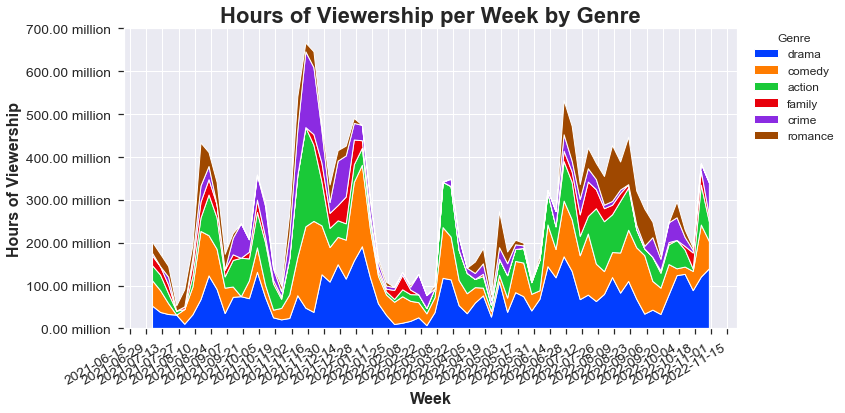

In [69]:
#seaborn chart
#Seaborn area plot for hours of viewership by genre:
sns.set_theme(style="darkgrid", font_scale=1.25,rc={"lines.linewidth": 2.5,'xtick.bottom': True,
    'ytick.left': True,})
plt.rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("bright", 6)
# Create the plot, take out conf int, set color and ax:
plt.stackplot(genres_df.week, genres_df.drama, genres_df.comedy, genres_df.action, genres_df.family, genres_df.crime, genres_df.romance,labels=["drama", "comedy", "action", "family", "crime", 	"romance"], colors=palette) 
# Gen y labels and label million:
ylabels = ['{:,.2f}'.format(y) + ' million' for y in ax.get_yticks()]
# Set y labels:
ax.set_yticklabels(ylabels)
# Format x label for dates: 
# Define the date format and set it to the x-axis:
date_form = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for every other week using (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# add minor tick marks on x-axis:
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=2))
# Format for date x-axis, turns date to side:
fig.autofmt_xdate()
plt.ylabel('Hours of Viewership', size=16, weight="bold")
plt.xlabel('Week', size=16, weight="bold")
plt.title('Hours of Viewership per Week by Genre',size=22, weight="bold")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Genre', fontsize='12', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Save fig:
plt.savefig('./output_data/area_time_series_genre.png')


- The time series anlaysis of hours watched broken out by genre shows significant variation in both the hours watched and the genre breakdown across time. There were no large seasonality effects shown in the data, but rather viewership increases appear to be driven by the release of a few popular movies. Family films did show a small increase during the holiday season, but no more so than the summer months, when family film viewership was driven by the release of The Sea Beast. With more years of data we could see if the pattern tends to repeat, but no conclusions can be drawn from this data set. Drama, comedy, and action are popular across the entire time-series, with family, crime, and romance appearing with specific releases. The films driving vieweship increases represent 50% of the total hours watched for english-language films, 

# Drivers of Viewership increase
- Red Notice (Action, Comedy, Crime)
- Don't Look Up (Comedy, Drama)
- Hustle (Comedy, Drama)
- The Man From Toronto (Action,Comedy, Drama, Romance)
- The Sea Beast (Comedy, Family)
- Purple Hearts (Drama, Romance)

In [23]:
#prepare daataframe for chi-square test to check null hypothesis that all genres are equally popular
#total hours watched by genre
drama_tot = netflix_df.loc[netflix_df['drama']==True]
drama_tot_sum = drama_tot['weekly_hours_viewed'].sum()/1000000
comedy_tot = netflix_df.loc[netflix_df['comedy']==True]
comedy_tot_sum=comedy_tot['weekly_hours_viewed'].sum()/1000000
action_tot = netflix_df.loc[netflix_df['action']==True]
action_tot_sum=action_tot['weekly_hours_viewed'].sum()/1000000
family_tot = netflix_df.loc[netflix_df['family']==True]
family_tot_sum=family_tot['weekly_hours_viewed'].sum()/1000000
crime_tot = netflix_df.loc[netflix_df['crime']==True]
crime_tot_sum=crime_tot['weekly_hours_viewed'].sum()/1000000
romance_tot = netflix_df.loc[netflix_df['romance']==True]
romance_tot_sum=romance_tot['weekly_hours_viewed'].sum()/1000000
expected_hours = netflix_df['weekly_hours_viewed'].sum()/6000000
#create dataframe
genres_list = ['drama','comedy','action','family','crime','romance']
genres_tot_list=[drama_tot_sum,comedy_tot_sum,action_tot_sum,family_tot_sum,crime_tot_sum,romance_tot_sum]
genres_expected_list=[expected_hours,expected_hours,expected_hours,expected_hours,expected_hours,expected_hours]
genres_tot = pd.DataFrame(zip(genres_list,genres_tot_list,genres_expected_list),columns=['genre','hours watched','expected hours']).set_index('genre')
genres_tot = genres_tot.sort_values(by='hours watched',ascending=False)
genres_tot


,hours watched,expected hours
genre,,
drama,40188.67,8055.44
action,14595.78,8055.44
crime,12737.41,8055.44
comedy,12288.32,8055.44
romance,9394.08,8055.44
family,2708.11,8055.44


#### Hours Watched By Genre
- Drama accounted for significantly greater viewership than any other genre. All ten of the most popular shows were included in the drama genre, while action and crime each had four. The chi-test shows that the genre distribution differs significantly what would be expected if all genres were equally popular.


In [25]:
#chi-test
critical_value = stat.chi2.ppf(q=0.95, df = 5)
chi=stat.chi2_contingency(genres_tot)
print(critical_value)
chi

11.070497693516351


(15986.905823906916,
 0.0,
 5,
 array([[31617.74161263, 16626.36838737],
        [14844.92969548,  7806.29030452],
        [13627.00977778,  7165.84022222],
        [13332.68967153,  7011.07032847],
        [11435.89164821,  6013.62835179],
        [ 7054.10759437,  3709.44240563]]))

### **Kevin's Code for Analysis:**

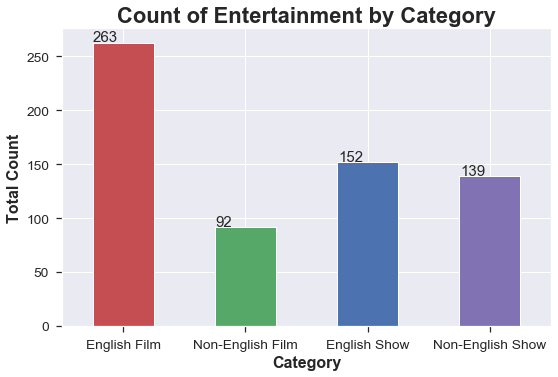

In [106]:
movie_show_breakdown = pd.DataFrame({'Category':['English Film', 'Non-English Film', 'English Show','Non-English Show'], 'Total Count':[263, 92, 152,139]})
ax=movie_show_breakdown.plot.bar(x='Category', y='Total Count',color=['r','g','b','m'], rot=0, legend=False)
plt.rcParams.update({'figure.autolayout': True})
plt.title("Count of Entertainment by Category", size=22, weight="bold")
plt.ylabel("Total Count", size=16, weight="bold")
plt.xlabel("Category", size=16, weight="bold")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig("./output_data/category_bar.png")

plt.show()

In [70]:
observed_film = pd.Series([non_eng_film_df['drama'].sum(),
non_eng_film_df['comedy'].sum(),
non_eng_film_df['action'].sum(),
non_eng_film_df['family'].sum(),
non_eng_film_df['crime'].sum(),
non_eng_film_df['romance'].sum()],
 index=["drama","comedy", "action",'family','crime','romance'])

observed_film

drama      147
comedy      76
action      55
family      11
crime       41
romance     51
dtype: int64

In [71]:
expected_film = pd.Series([eng_film_df['drama'].sum(),
eng_film_df['comedy'].sum(),
eng_film_df['action'].sum(),
eng_film_df['family'].sum(),
eng_film_df['crime'].sum(),
eng_film_df['romance'].sum()],
 index=["drama","comedy", "action",'family','crime','romance'])

expected_film

drama      275
comedy     276
action     238
family      73
crime      126
romance     90
dtype: int64

In [72]:
film_df = pd.DataFrame([observed_film]).T
film_df[1] = expected_film
film_df.columns = ["Non-English Films", "English Films"]
film_df

,Non-English Films,English Films
drama,147,275
comedy,76,276
action,55,238
family,11,73
crime,41,126
romance,51,90


In [74]:
critical_value_film = stat.chi2.ppf(q = 0.95, df = 5)
critical_value_film

11.070497693516351

In [75]:
# Since the chi square value of xxx exceeds the critical value of 11.07, we conclude that the results are statistically significant.
stat.chi2_contingency(film_df)

(43.53134661697127,
 2.8832517822160287e-08,
 5,
 array([[110.20013708, 311.79986292],
        [ 91.92049349, 260.07950651],
        [ 76.51336532, 216.48663468],
        [ 21.93557231,  62.06442769],
        [ 43.61000685, 123.38999315],
        [ 36.82042495, 104.17957505]]))

In [76]:
observed_show = pd.Series([non_eng_show_df['drama'].sum(),
non_eng_show_df['comedy'].sum(),
non_eng_show_df['action'].sum(),
non_eng_show_df['family'].sum(),
non_eng_show_df['crime'].sum(),
non_eng_show_df['romance'].sum()],
 index=["drama","comedy", "action",'family','crime','romance'])

observed_show

drama      556
comedy     154
action     163
family      42
crime      160
romance    162
dtype: int64

In [77]:
expected_show = pd.Series([eng_show_df['drama'].sum(),
eng_show_df['comedy'].sum(),
eng_show_df['action'].sum(),
eng_show_df['family'].sum(),
eng_show_df['crime'].sum(),
eng_show_df['romance'].sum()],
 index=["drama","comedy", "action",'family','crime','romance'])

expected_show

drama      543
comedy     146
action     129
family      46
crime      187
romance    119
dtype: int64

In [78]:
show_df = pd.DataFrame([observed_show]).T
show_df[1] = expected_show
show_df.columns = ["Non-English Shows", "English Shows"]
show_df

,Non-English Shows,English Shows
drama,556,543
comedy,154,146
action,163,129
family,42,46
crime,160,187
romance,162,119


In [79]:
critical_value_show = stat.chi2.ppf(q = 0.95, df = 5)
critical_value_show

11.070497693516351

In [80]:
stat.chi2_contingency(show_df)

(11.33257099656549,
 0.045170554402416296,
 5,
 array([[564.79559618, 534.20440382],
        [154.17532198, 145.82467802],
        [150.06398006, 141.93601994],
        [ 45.22476111,  42.77523889],
        [178.32945575, 168.67054425],
        [144.41088492, 136.58911508]]))

In [81]:
total_genre=film_df.join(show_df)
total_genre

,Non-English Films,English Films,Non-English Shows,English Shows
drama,147,275,556,543
comedy,76,276,154,146
action,55,238,163,129
family,11,73,42,46
crime,41,126,160,187
romance,51,90,162,119


In [82]:
critical_value_total = stat.chi2.ppf(q = 0.95, df = 5)
critical_value_total

11.070497693516351

In [83]:
stat.chi2_contingency(total_genre)


(250.45108849822878,
 1.0024445472850123e-44,
 15,
 array([[149.89679255, 424.11743404, 486.67278841, 460.312985  ],
        [ 64.2555613 , 181.80444904, 208.61976203, 197.32022763],
        [ 57.65261252, 163.12209002, 187.1818417 , 177.04345577],
        [ 16.9508536 ,  47.96068288,  55.03466115,  52.05380238],
        [ 50.65545784, 143.32436627, 164.46404553, 155.55613037],
        [ 41.58872219, 117.67097775, 135.02690119, 127.71339886]]))

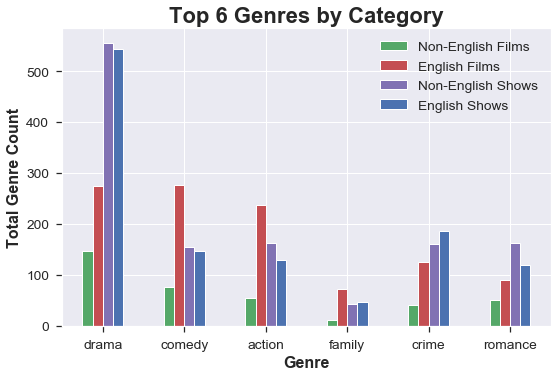

In [110]:
plt.rcParams.update({'figure.autolayout': True})
ax2=total_genre.plot.bar(rot=0,color=['g','r','m','b'])
plt.xlabel('Genre',size=16, weight="bold")
plt.ylabel('Total Genre Count',size=16, weight="bold")
plt.title('Top 6 Genres by Category',size=22, weight="bold")
# for p in ax2.patches:
#     ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
#     # ax2.patches()
# plt.show()
plt.savefig("./output_data/total_genre_bar.png")
